# KNN 

In [39]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
wine = load_wine()
type(wine)

sklearn.utils._bunch.Bunch

In [41]:
# Understanding the dataset, data exploration
wine.keys() # the dataset is a dictionary. so we can use the keys() method to see what keys are available

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [42]:
wine["data"][:2]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])

In [43]:
wine["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [44]:
wine["frame"] # empty

In [45]:
wine["target_names"] # the target is a classification problem with 3 classes

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
print(wine["DESCR"]) # description of the dataset 

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [47]:
print(wine["feature_names"]) # the features are the columns of the dataset

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [48]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"]) 
df = pd.concat([df, pd.DataFrame(wine["target"], columns=["wine_class"])], axis="columns") # add the target column to the dataframe
df.head()   

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Text(0, 0.5, 'count')

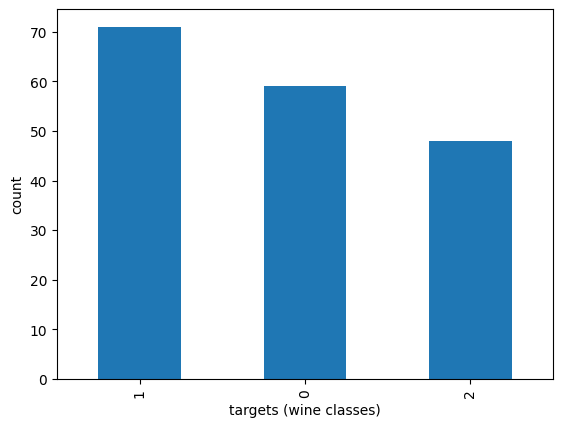

In [49]:
df["wine_class"].value_counts().plot(kind="bar") # plot the target column
plt.xlabel("targets (wine classes)")
plt.ylabel("count")

In [50]:
#sns.pairplot(df, hue="wine_class") # extremely hard to see anything in this pairplot

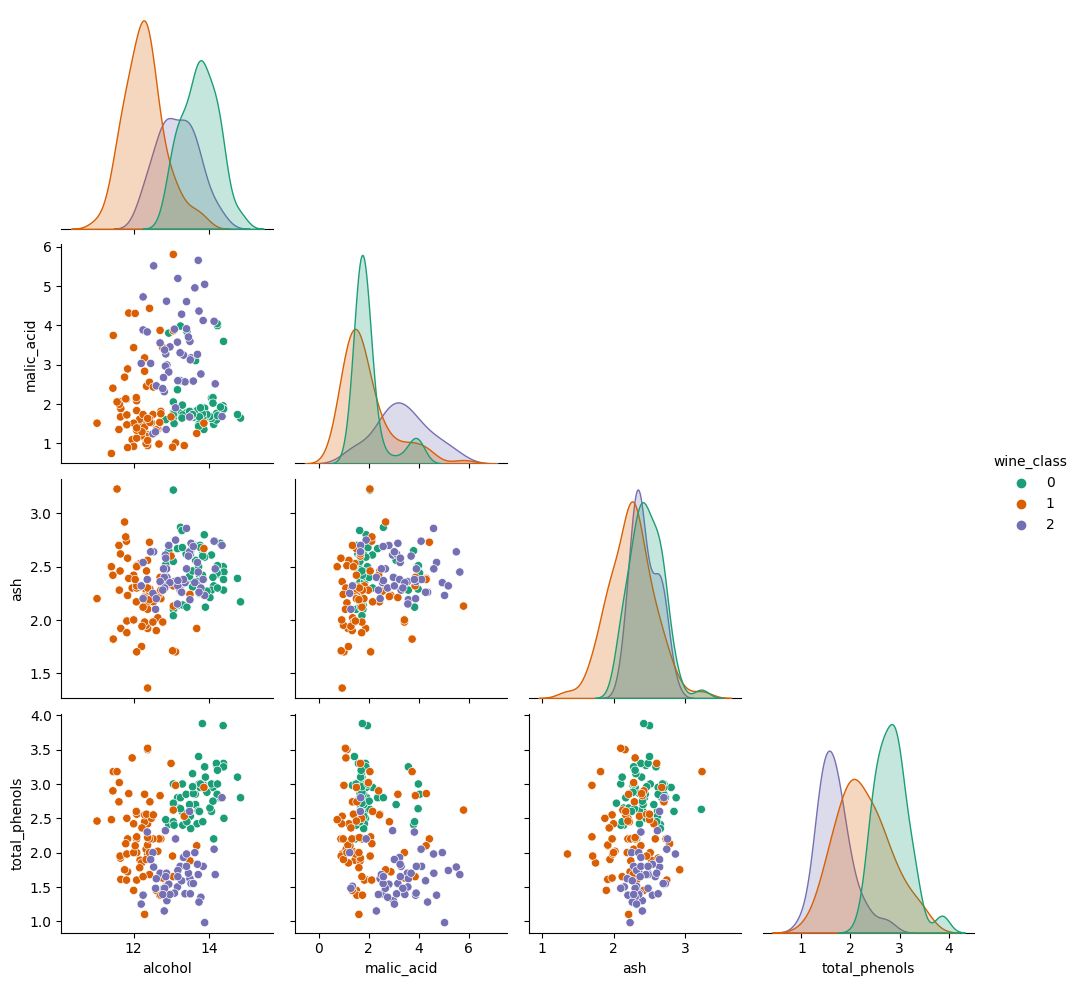

In [51]:
# smarter pairplot
sns.pairplot(
    data=df[["alcohol", "malic_acid", "ash", "total_phenols", "wine_class"]],
    hue="wine_class",
    corner=True,
    palette="Dark2",
)


In [52]:
df.corr().head() # correlation matrix of the dataset
# 1 = perfect positive correlation, -1 = perfect negative correlation, 0 = no correlation

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179


<Axes: >

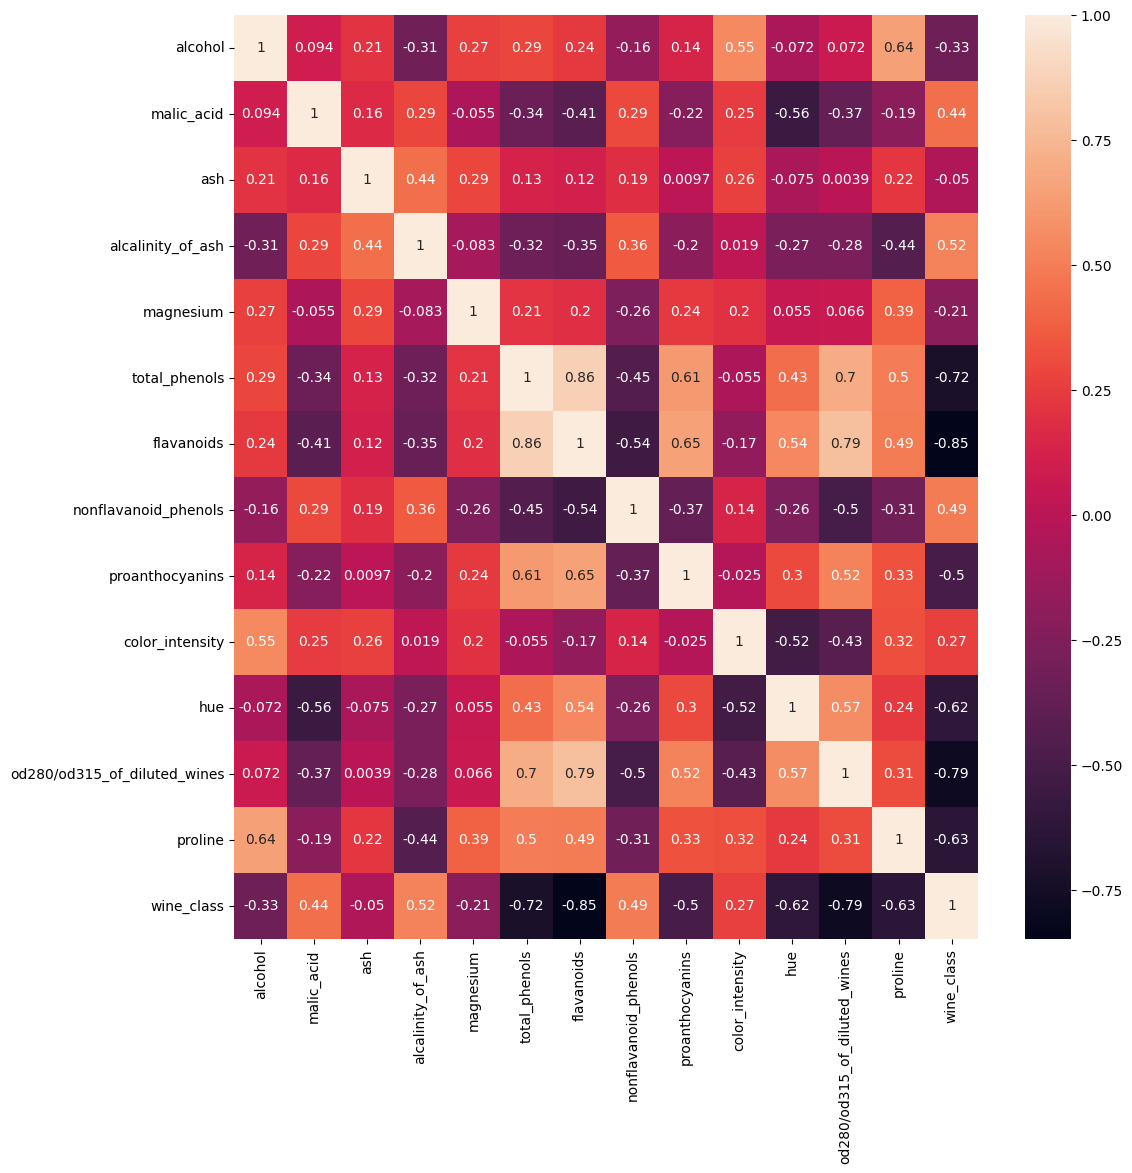

In [53]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)

In [54]:
df = df.drop("total_phenols", axis=1) # drop the total_phenols column because it has a high correlation with the flavanoids column
# Having high correlation between features can cause problems for the model because it can't tell which feature is more important
# and it can cause overfitting
# it is also called multicollinearity
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [55]:
df.shape

(178, 13)

In [56]:
wine["feature_names"].__len__() # checking the number of features

13

# KNN

In [81]:
from sklearn.preprocessing import MinMaxScaler  # import the MinMaxScaler from sklearn
from sklearn.model_selection import train_test_split # import the train_test_split function from sklearn
from sklearn.neighbors import KNeighborsClassifier # import the KNN classifier from sklearn 


X,y = df.drop("wine_class", axis=1), df["wine_class"] # split the dataset into features and target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # split the dataset into train and test sets

scaler = MinMaxScaler() # create an instance of the MinMaxScaler
scaled_X_train = scaler.fit_transform(X_train) # fit the scaler to the train set and transform it
scaled_X_test = scaler.transform(X_test) # transform the test set

model = KNeighborsClassifier(n_neighbors=1) # create an instance of the KNN classifier
# 1 neighbor is the simplest model, it is called the nearest neighbor model

model.fit(scaled_X_train, y_train) # fit the model to the train set

y_pred = model.predict(scaled_X_test) # predict the target values for the test set
print(f"{y_pred}")
print(f"{y_test.values=}")

[0 0 2 0 1 0 1 2 1 2 0 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 0 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1]
y_test.values=array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1])


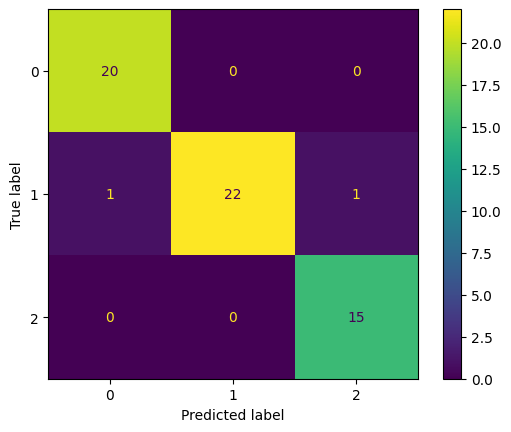

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred) # confusion matrix

ConfusionMatrixDisplay(cm).plot()

In [83]:
cr = classification_report(y_test, y_pred) # classification report
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.92      0.96        24
           2       0.94      1.00      0.97        15

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [84]:
y_test.shape, y_train.shape

((59,), (119,))

## Elbow plot to choose K

NOTE: important to divide so that we also have validation (train|val|test split) and do the elbow plot on validation data,  
then train on both validation and training data.  
evaluate on test data.  

error=0.03389830508474578


Text(0, 0.5, 'error rate')

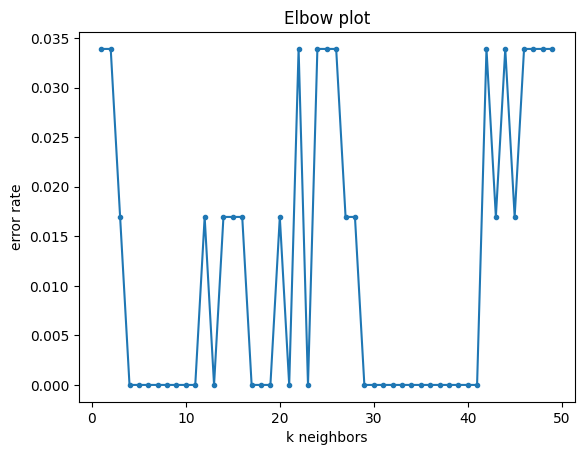

In [92]:
from sklearn.metrics import accuracy_score

error = 1-accuracy_score(y_test, y_pred) # calculate the error rate
print(f"{error=}")
error_lst = []

for k in range(1,50): # loop over k values from 1 to 50
    model = KNeighborsClassifier(n_neighbors=k) # create an instance of the KNN classifier
    model.fit(scaled_X_train, y_train) # fit the model to the train set
    y_pred = model.predict(scaled_X_test) # note use scaled_X_val here
    error_lst.append(1-accuracy_score(y_test, y_pred)) # calculate the error rate and append it to the error_lst

plt.plot(range(1,50), error_lst, ".-")
plt.title("Elbow plot")
plt.xlabel("k neighbors")
plt.ylabel("error rate")



accuracy_score(y_test, y_pred)=1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



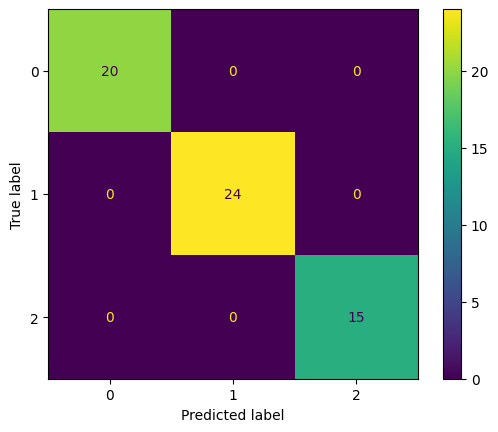

In [95]:
# Choose a k value that has the lowest error rate
model = KNeighborsClassifier(9)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
print(f"{accuracy_score(y_test, y_pred)=}")

cm = confusion_matrix(y_test, y_pred) # confusion matrix

ConfusionMatrixDisplay(cm).plot()

cr = classification_report(y_test, y_pred) # classification report
print(cr)